In [1]:
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('satellite1.xlsx')

In [3]:
df.head(10)

,Band1,Band2,Band3,Band4,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [4]:
summary = df.describe(include = 'all').transpose()
summary.head(len(summary))

,count,mean,std,min,25%,50%,75%,max
Band1,300.0,5.843333,0.826680,4.3,5.1,5.80,6.4,7.9
Band2,300.0,3.057333,0.435137,2.0,2.8,3.00,3.3,4.4
Band3,300.0,3.758000,1.762344,1.0,1.6,4.35,5.1,6.9
Band4,300.0,1.199333,0.760962,0.1,0.3,1.30,1.8,2.5
Class,300.0,2.000000,0.817861,1.0,1.0,2.00,3.0,3.0


In [5]:
df = df.dropna()
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'], axis=1), df['Class'], test_size=0.40, random_state=70)

# train the model
model = MLPClassifier(activation='relu')
model.fit(X_train, y_train)
model.score(X_train,y_train)

C:\Users\fullstack\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9777777777777777

In [6]:
x = df.iloc[:, [0,1,2,3]].values

In [7]:
kmeans5 = KMeans(n_clusters=3)
result = kmeans5.fit_predict(x)

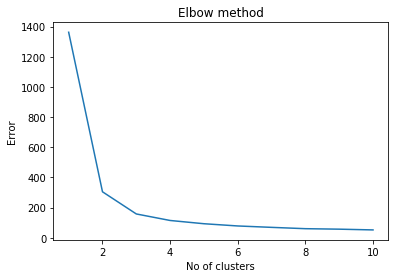

In [8]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
#import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.savefig('elbow.jpg', dpi=300)
plt.show()

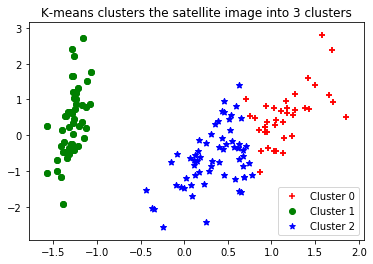

In [9]:
pca = PCA(n_components=2, whiten=True)
pca.fit(x)

y = pca.fit_transform(x)[:, 1]
x = pca.fit_transform(x)[:, 0]


for i in range(0, len(x)):
    if kmeans5.labels_[i] == 0:
        c1 = plt.scatter(x[i],y[i],c='r',marker='+')
    elif kmeans5.labels_[i] == 1:
        c2 = plt.scatter(x[i],y[i],c='g',marker='o')
    elif kmeans5.labels_[i] == 2:
        c3 = plt.scatter(x[i],y[i],c='b',marker='*')

plt.legend([c1, c2, c3],['Cluster 0', 'Cluster 1','Cluster 2'],loc='best')
plt.title('K-means clusters the satellite image into 3 clusters')
plt.savefig('satelliteimage.jpg', dpi=300)
plt.show()